In [1]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import pymoc
import glob
from time import sleep
import os
from astropy.nddata.utils import Cutout2D
from astropy.convolution import Gaussian2DKernel
#import herschelhelp.cutouts_server as ctts
import scipy

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
#from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
from herschelhelp import image_plotting,utils
import pyvo as vo
import glob

import copy
from scipy.signal import convolve2d

In [2]:
magphys_all_en1 = Table.read('../data/magphys/ELAIS_opt.fits')
magphys_all_en1.rename_column('galaxy_id','ID')
magphys_all_en1['ID'] = magphys_all_en1['ID'].astype('int64')

stellar_mass_cat = Table.read('../data/EN1_opt_spitzer_merged_vac_opt3as_irac4as_all_hpx_masses_public.fits')
magphys_cat = join(magphys_all_en1,stellar_mass_cat,keys='ID',join_type='inner')

lofar_orig = Table.read('../data/data_release/final_cross_match_catalogue-v1.0.fits')
print(len(lofar_orig))
lofar_orig[0]

31610


<Row index=0 masked=True>
     Source_Name               RA                DEC                 E_RA                E_DEC               Total_flux           E_Total_flux            Peak_flux            E_Peak_flux      S_Code         Maj                   Min                  PA                 E_Maj                  E_Min                 E_PA         DC_Maj  DC_Min  DC_PA         Isl_rms         FLAG_WORKFLOW Prefilter  NoID       lr_fin             optRA              optDec      LGZ_Size LGZ_Width  LGZ_PA Assoc Assoc_Qual Art_prob Blend_prob Hostbroken_prob Imagemissing_prob Zoom_prob        Created         Position_from Renamed_from FLAG_OVERLAP_RADIO flag_clean_radio    ID    X_IMAGE  Y_IMAGE     ALPHA_J2000        DELTA_J2000    flag_clean ID_OPTICAL ID_SPITZER FLAG_OVERLAP     EBV        FUV_flux_corr       FUV_fluxerr_corr  FUV_mag_corr FUV_magerr_corr     NUV_flux_corr       NUV_fluxerr_corr  NUV_mag_corr NUV_magerr_corr     u_flux_corr        u_fluxerr_corr      u_mag_corr    u_magerr_corr    g_flux_corr       g_fluxerr_corr       g_mag_corr     g_magerr_corr r_flux_corr r_fluxerr_corr r_mag_corr r_magerr_corr i_flux_corr i_fluxerr_corr i_mag_corr i_magerr_corr    z_flux_corr        z_fluxerr_corr       z_mag_corr     z_magerr_corr y_flux_corr y_fluxerr_corr y_mag_corr y_magerr_corr g_hsc_flux_corr g_hsc_fluxerr_corr g_hsc_mag_corr g_hsc_magerr_corr r_hsc_flux_corr r_hsc_fluxerr_corr r_hsc_mag_corr r_hsc_magerr_corr i_hsc_flux_corr i_hsc_fluxerr_corr i_hsc_mag_corr i_hsc_magerr_corr z_hsc_flux_corr z_hsc_fluxerr_corr z_hsc_mag_corr z_hsc_magerr_corr y_hsc_flux_corr y_hsc_fluxerr_corr y_hsc_mag_corr y_hsc_magerr_corr nb921_hsc_flux_corr nb921_hsc_fluxerr_corr nb921_hsc_mag_corr nb921_hsc_magerr_corr    J_flux_corr      J_fluxerr_corr      J_mag_corr     J_magerr_corr    K_flux_corr       K_fluxerr_corr       K_mag_corr    K_magerr_corr ch1_swire_flux_corr ch1_swire_fluxerr_corr ch1_swire_mag_corr ch1_swire_magerr_corr ch2_swire_flux_corr ch2_swire_fluxerr_corr ch2_swire_mag_corr ch2_swire_magerr_corr ch3_swire_flux_corr ch3_swire_fluxerr_corr ch3_swire_mag_corr ch3_swire_magerr_corr ch4_swire_flux_corr ch4_swire_fluxerr_corr ch4_swire_mag_corr ch4_swire_magerr_corr ch1_servs_flux_corr ch1_servs_fluxerr_corr ch1_servs_mag_corr ch1_servs_magerr_corr ch2_servs_flux_corr ch2_servs_fluxerr_corr ch2_servs_mag_corr ch2_servs_magerr_corr Separation           help_id                RA_HELP           DEC_HELP      CLASS_STAR F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l  Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24 flag_mips_24 F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l  Bkg_PACS_100  Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160 flag_PACS_100 flag_PACS_160 F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500 flag_spire_250 flag_spire_350 flag_spire_500  Z_BEST Z_BEST_SOURCE  Z_SPEC Z_SOURCE  Z_QUAL z1_median  z1_min  z1_max z1_area z2_median  z2_min  z2_max z2_area nfilt_eazy nfilt_atlas nfilt_ananna chi_r_best chi_r_stellar stellar_type  AGN   optAGN  IRAGN  XrayAGN 2RXS_ID XMMSL2_ID ap_to_model_g ap_to_model_err_g ap_to_model_r ap_to_model_err_r   ap_to_model_z    ap_to_model_err_z  zmodel chi_best Mass_median Mass_l68 Mass_u68 Nfilts  u_rest  g_rest  r_rest  i_rest  z_rest  y_rest  J_rest  K_rest ch1_servs_rest ch2_servs_rest ch1_swire_rest ch2_swire_rest ch3_swire_rest ch4_swire_rest XID+_rerun_mips XID+_rerun_pacs XID+_rerun_SPIRE
       bytes22              float64            float64             float64              float64               float64               float64 

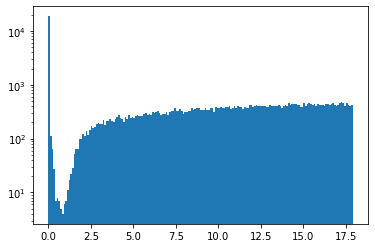

61.684879535652904% of LOFAR sources have a magphys source within 1.0 arcseconds
164376


<Row index=0>
  ID     z      chi2  chi2_99_flag fmu_sfh_best fmu_sfh_sigma fmu_sfh_bayes fmu_sfh_03 fmu_sfh_16 fmu_sfh_50 fmu_sfh_84 fmu_sfh_98 fmu_IR_best fmu_IR_sigma fmu_IR_bayes fmu_IR_3 fmu_IR_16 fmu_IR_50 fmu_IR_86 fmu_IR_98 mu_best mu_sigma  mu_bayes   mu_03   mu_16   mu_50   mu_84   mu_98  tau_V_best tau_V_sigma tau_V_bayes tau_V_03 tau_V_16 tau_V_50 tau_V_84 tau_V_98 sSFR_best   sSFR_sigma   sSFR_bayes     sSFR_03       sSFR_16      sSFR_50      sSFR_84      sSFR_98      Mstar_best  Mstar_sigma   Mstar_bayes     Mstar_03      Mstar_16      Mstar_50      Mstar_84      Mstar_98    Ldust_best  Ldust_sigma  Ldust_bayes    Ldust_03    Ldust_16     Ldust_50     Ldust_84      Ldust_98   TC_ISM_best TC_ISM_sigma TC_ISM_bayes TC_ISM_03 TC_ISM_16 TC_ISM_50 TC_ISM_84 TC_ISM_98 TW_BC_best TW_BC_sigma TW_BC_bayes TW_BC_03 TW_BC_16 TW_BC_50 TW_BC_84 TW_BC_98 xi_C_tot_best xi_C_tot_sigma xi_C_tot_bayes xi_C_tot_03 xi_C_tot_16 xi_C_tot_50 xi_C_tot_84 xi_C_tot_98 xi_PAH_tot_best xi_PAH_tot_sigma xi_PAH_tot_bayes xi_PAH_tot_03 xi_PAH_tot_16 xi_PAH_tot_50 xi_PAH_tot_84 xi_PAH_tot_98 xi_MIR_tot_best xi_MIR_tot_sigma xi_MIR_tot_bayes xi_MIR_tot_03 xi_MIR_tot_16 xi_MIR_tot_50 xi_MIR_tot_84 xi_MIR_tot_98 xi_W_tot_best xi_W_tot_sigma xi_W_tot_bayes xi_W_tot_03 xi_W_tot_16 xi_W_tot_50 xi_W_tot_84 xi_W_tot_98 tau_V_ISM_best tau_V_ISM_sigma tau_V_ISM_bayes tau_V_ISM_03 tau_V_ISM_16 tau_V_ISM_50 tau_V_ISM_84 tau_V_ISM_98 Mdust_best Mdust_sigma Mdust_bayes  Mdust_03  Mdust_16  Mdust_50  Mdust_84   Mdust_98  SFR_best  SFR_sigma  SFR_bayes    SFR_03     SFR_16     SFR_50    SFR_84     SFR_98   ID_OPTICAL ID_SPITZER         RA                DEC                  help_id               RA_HELP          DEC_HELP         EBV     CLASS_STAR FLAG_OVERLAP FLAG_CLEAN   u_flux   u_fluxerr   g_flux g_fluxerr  r_flux r_fluxerr  i_flux  i_fluxerr   z_flux z_fluxerr   y_flux  y_fluxerr  g_hsc_flux g_hsc_fluxerr r_hsc_flux r_hsc_fluxerr i_hsc_flux i_hsc_fluxerr z_hsc_flux z_hsc_fluxerr y_hsc_flux y_hsc_fluxerr nb921_hsc_flux nb921_hsc_fluxerr   J_flux  J_fluxerr   K_flux  K_fluxerr ch1_servs_flux ch1_servs_fluxerr ch2_servs_flux ch2_servs_fluxerr ch1_swire_flux ch1_swire_fluxerr ch2_swire_flux ch2_swire_fluxerr ch3_swire_flux ch3_swire_fluxerr ch4_swire_flux ch4_swire_fluxerr F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l  Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24 flag_mips_24 F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l Bkg_PACS_100 Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160 flag_PACS_100 flag_PACS_160 F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500 flag_spire_250 flag_spire_350 flag_spire_500  Z_BEST Z_BEST_SOURCE  Z_SPEC z1_median  z1_min  z1_max z1_area z2_median  z2_min  z2_max z2_area nfilt_eazy nfilt_atlas nfilt_ananna     chi_r_best     chi_r_stellar stellar_type  AGN   optAGN  IRAGN  XrayAGN hp_idx_11 hp_depth_cluster tot_corr_g tot_corr_err_g tot_corr_r tot_corr_err_r tot_corr_z tot_corr_err_z  zmodel  chi_best Mass_median  Mass_l68  Mass_u68   SFR_median    SFR_l68      SFR_u68    Nfilts   u_rest     g_rest     r_rest     i_rest     z_rest     y_rest     J_rest     K_rest   ch1_servs_rest ch2_servs_rest ch1_swire_rest ch2_swire_rest ch3_swire_rest ch4_swire_rest
                                                                                                                                                                                                                                                                                                                                            

In [3]:
#remove sources that are already detected in the LOFAR catalogue

ras = magphys_cat['RA']
decs = magphys_cat['DEC']

high_mass_coords = SkyCoord(ra=ras,dec=decs)

mask = ~np.isnan(lofar_orig['optRA'])
ras = lofar_orig['optRA'][mask]
decs = lofar_orig['optDec'][mask]
help_ldust_coords = SkyCoord(ra=ras*u.degree,dec=decs*u.degree)

idx,d2d,_ = high_mass_coords.match_to_catalog_sky(help_ldust_coords)

d2d = d2d.value*3600
plt.hist(d2d,bins=np.arange(0,18,0.1),log=True)
plt.show()

sep_dist = 1.0
print('{}% of LOFAR sources have a magphys source within {} arcseconds'.format(np.sum(d2d<sep_dist)/np.sum(mask)*100,sep_dist))

mask = d2d<sep_dist
magphys_cat = magphys_cat[~mask]

print(len(magphys_cat))
magphys_cat[0]

In [22]:
#convert Ldust to radio luminosity
q = 1.9
lradio = np.log10(magphys_cat['Ldust_bayes']*3.8E26) - np.log10(3.75E12) - q
#predict flux at 150MHz observed frame in Jy
redshift = magphys_cat['z']
dist = cosmo.luminosity_distance(redshift).to(u.m).value
alpha = -0.6
flux_radio = 10**lradio / (4*np.pi*dist**2 * (1+redshift)**(-1-alpha))

flux_radio = flux_radio/1E-26

#create a mask that selects galaxies whose predicted flux at 150MHz is above f_lim
f_lim = 100
mask_detectable = flux_radio > f_lim*1E-6
pred_fluxes = flux_radio[mask_detectable]
print('There are {} sources with a predicted flux measured at 150MHz that are >{}uJy'.format(np.sum(mask_detectable),f_lim))

There are 15335 sources with a predicted flux measured at 150MHz that are >100uJy


In [5]:
ras_new = magphys_cat[mask_detectable]['RA']
decs_new = magphys_cat[mask_detectable]['DEC']
ids_new = magphys_cat[mask_detectable]['ID']

ras_old = lofar_orig['RA']
decs_old = lofar_orig['DEC']
ids_old = lofar_orig['Source_Name']

ras_all = np.append(ras_new.data.data,ras_old.data.data)
decs_all = np.append(decs_new.data.data,decs_old.data.data)
ids_all = np.append(ids_new.data.data,ids_old.data.data).astype(str)

In [178]:
fname = '../data/image_full_ampphase_di_m.NS.psf.fits'
hdulist = fits.open(fname)
radim_header_psf = hdulist[0].header
radim_wcs_psf = wcs.WCS(radim_header_psf).celestial
radim_data_psf = hdulist[0].data[0][0]
radim_pixsize = abs(radim_wcs_psf.wcs.cdelt[0])*3600
hdulist.close()

fname = '../data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0].astype('f4')*1000 #convert to mJy
hdulist.close()
radim_header['NAXIS']=2
radim_header['WCSAXES']=2

fname = '../data/data_release/radio_rms_image.fits'
hdulist = fits.open(fname)
radim_header_err = hdulist[0].header
radim_wcs_err = wcs.WCS(radim_header_err).celestial
radim_err = hdulist[0].data[0][0].astype('f4')*1000 #convert to mJy
hdulist.close()

fname = '../data/data_release/image_full_ampphase_di_m.NS.mask01-2.fits'
hdulist = fits.open(fname)
radim_header_mask = hdulist[0].header
mask_deconv_wcs = wcs.WCS(radim_header_mask).celestial
mask_deconv = hdulist[0].data[0][0]
hdulist.close()


#remove the 3rd and 4th axis from teh lofar image as they confuse the plotting functions in xidplus
#these extra dimesnions are for frequency and aren't included in these fits files
for n in ['3','4']:
    for val in ['RPIX','DELT','UNIT','TYPE','RVAL']:
        try:
            radim_header.remove('C{}{}'.format(val,n))
        except:()
radim_header.remove('NAXIS3')
radim_header.remove('NAXIS4')
radim_header['NAXIS']=2
radim_header['WCSAXES']=2

  'HZ' -> 'Hz'. [astropy.wcs.wcs]
  'HZ' -> 'Hz'.


1


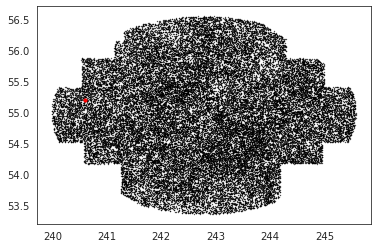

5 gaussian components in the moc
240.60898576147915 55.1924852127061


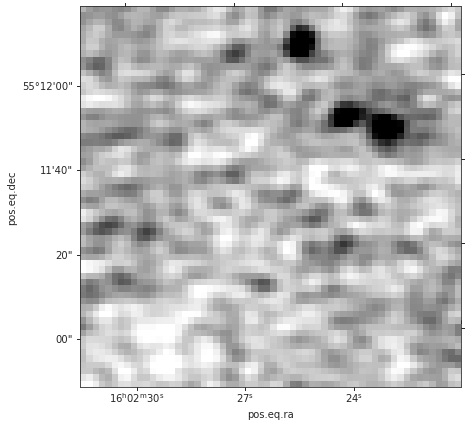

<Table masked=True length=5>
     Source_Name               RA         ... XID+_rerun_pacs XID+_rerun_SPIRE
       bytes22              float64       ...       bool            bool      
---------------------- ------------------ ... --------------- ----------------
ILTJ160222.90+551147.9 240.59539586513088 ...           False            False
ILTJ160223.02+551228.5 240.59593150566687 ...           False            False
ILTJ160223.99+551150.9 240.59994183742657 ...            True             True
ILTJ160225.18+551208.5 240.60493438709054 ...           False            False
ILTJ160232.35+551104.0 240.63479633937072 ...            True             True

In [179]:
#Select LOFAR gaussian sources to run XID+ on

source_num = 9000

ras = ras_new[source_num:source_num+1]
decs = decs_new[source_num:source_num+1]
print(len(ras))
ID = ids_all[source_num:source_num+1]


x = ras_all
y = decs_all
plt.scatter(x,y,s=0.1,c='black')

x = ras
y = decs
plt.scatter(x,y,s=10,c='red')
plt.show()

from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=ras, dec=decs)  
import pymoc
moc_near=pymoc.util.catalog.catalog_to_moc(c,60,15)

moc_mask = inMoc(lofar_orig['RA'],lofar_orig['DEC'],moc_near)
moc = pymoc.util.catalog.catalog_to_moc(c,60,15)

print('{} gaussian components in the moc'.format(moc_mask.sum()))

plot_params = {'marker':['o','+','o','v','X','d'],
              'col':['green','cyan','orange','red'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False,False]}
n=1
fig = plt.figure(figsize=[7,7])
ra = ras[0]
dec = decs[0]
print(ra,dec)
n_size = 60
box_length = 1.5/3600*n_size

wcs_plot,ax = image_plotting.image_plot(radim_data,ra,dec,radim_wcs,box_length,fig)
#wcs_plot,ax = image_plotting.image_plot(mask_deconv,ra,dec,mask_deconv_wcs,box_length,fig)
#plt.contour(prf.array,color='red')
plt.show()

lofar_orig[moc_mask]

In [214]:
#create a cutout of the map around the centre cooridnate to speed up creation of the prior class
size = 120
cutout = Cutout2D(radim_data,c,size,wcs=radim_wcs,copy=True) 
im_data = cutout.data
im_wcs = cutout.wcs
im_header = im_wcs.to_header()
im_header['NAXIS'] = 2
im_header['NAXIS1'] = im_wcs.pixel_shape[0]
im_header['NAXIS2'] = im_wcs.pixel_shape[1]

cutout = Cutout2D(radim_err,c,size,wcs=radim_wcs,copy=True) 
im_err = cutout.data

In [215]:
#prior=xidplus.prior(radim_data,radim_err,radim_header,radim_header, moc=moc)#Initialise with map, uncertianty map, wcs info and primary header

prior=xidplus.prior(im_data,im_err,im_header,im_header, moc=moc)#Initialise with map, uncertianty map, wcs info and primary header

prior.prior_cat(ras_all,decs_all,'prior_cat',ID=ids_all,moc=moc)#Set input catalogue
prior.prior_bkg(-5.0,5)#Set prior on background (assumes Gaussian pdf with mu and sigma)

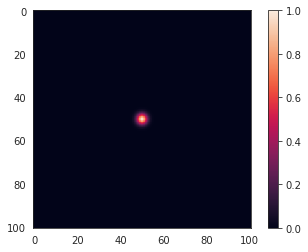

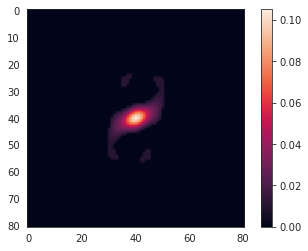

In [216]:
#get PSF for sources

#LOFAR restoring beam 
n_size = 101
FWHM_factor = 2*np.sqrt(2*np.log(2))
sig_maj = 4/FWHM_factor#/2.355
sig_min = 6/2.355


prf_true = Gaussian2DKernel(sig_maj,x_size=n_size,y_size=n_size)
prf_true.normalize(mode='peak')

plt.imshow(prf_true.array)
plt.colorbar()
plt.show()

#dirty beam 
psf_dirty,coords,_ = pickle.load(open('data/PSF_coords.pkl','rb'))

ras_psf = coords[::2]
decs_psf = coords[1::2]
coords_psf = SkyCoord(ra=ras_psf*u.degree,dec=decs_psf*u.degree)

coords_sources = SkyCoord(ra=prior.sra*u.deg,dec=prior.sdec*u.deg)

idx,_,_ = coords_sources.match_to_catalog_sky(coords_psf)

prfs = []
pinds = []

for n in range(len(prior.sra)):
    if 'ILTJ' in prior.ID[n]:
        prfs.append(prf_true.array)
        
    else:
        prfs.append(psf_dirty[idx[n]])
        plt.imshow(psf_dirty[idx[n]])
        plt.colorbar()
        plt.show()
    #print(prfs[n].shape)
    pinds.append(np.arange(0,prfs[n].shape[0],1))

In [217]:
prior.set_prfs(prfs,pinds,pinds)

prior.get_pointing_matrix_multiple_prf()
prior.upper_lim_map()

print('fitting '+ str(prior.nsrc)+' sources \n')
print('using ' +  str(prior.snpix) + ' pixels')

fitting 6 sources 

using 5000 pixels


In [218]:
from xidplus.numpyro_fit import LOFAR150
fit=LOFAR150.LOFAR_150(prior,num_samples=1000,num_warmup=1000)
samples = fit.get_samples()['src_f']
posterior = xidplus.posterior_numpyro(fit,[prior])

lofar_xidplus_cat = xidplus.catalogue.create_LOFAR_cat(posterior,prior)
lofar_xidplus_cat = Table.read(lofar_xidplus_cat)

Number of divergences: 0


([<aplpy.core.FITSFigure at 0x2ab16c73f2d0>],
 <Figure size 720x720 with 2 Axes>)

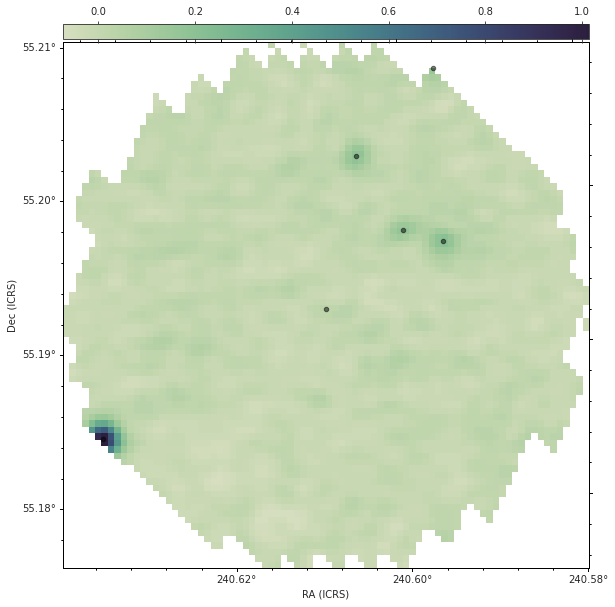

In [219]:
xidplus.plot_map([prior])

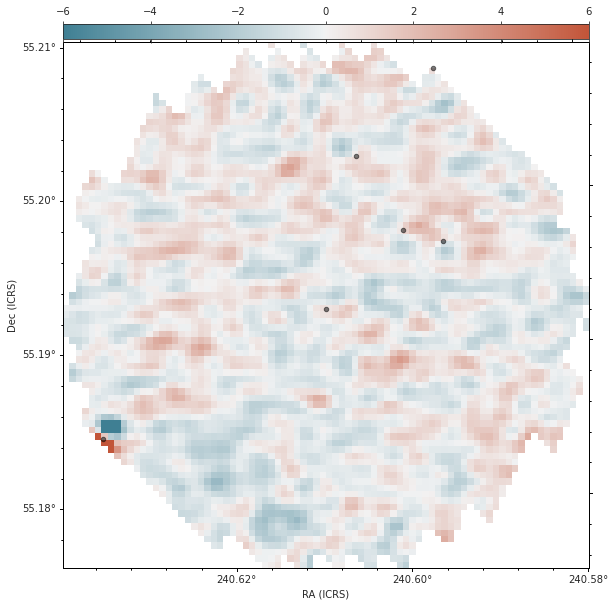

In [220]:
figs,fig=xidplus.plot_Bayes_pval_map([prior], posterior)

In [221]:
print('predicted flux is {}'.format(pred_fluxes[source_num]*1000))

for n in range(len(lofar_xidplus_cat)):
    ferr = lofar_xidplus_cat['FErr_LOFAR_150_u'][n] - lofar_xidplus_cat['FErr_LOFAR_150_l'][n]
    print('flux is {} +/- {}'.format(lofar_xidplus_cat['F_LOFAR_150'][n], ferr/2))

predicted flux is 0.10137736475512969
flux is 0.130473330616951 +/- 0.042016759514808655
flux is 0.22819459438323975 +/- 0.007519863545894623
flux is 0.1331275999546051 +/- 0.011097479611635208
flux is 0.1653323471546173 +/- 0.0074052512645721436
flux is 0.19630692899227142 +/- 0.007477208971977234
flux is 0.9705214500427246 +/- 0.008907526731491089


## Run without the new source to compare the p value map

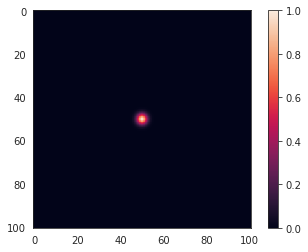

fitting 6 sources 

using 5000 pixels


In [41]:
prior.prior_cat(ras_all,decs_all,'prior_cat',ID=ids_all,moc=moc)#Set input catalogue
prior.prior_bkg(-5.0,5)#Set prior on background (assumes Gaussian pdf with mu and sigma)


n_size = 101
FWHM_factor = 2*np.sqrt(2*np.log(2))
sig_maj = 4/FWHM_factor#/2.355
sig_min = 6/2.355


prf_true = Gaussian2DKernel(sig_maj,x_size=n_size,y_size=n_size)
prf_true.normalize(mode='peak')

plt.imshow(prf_true.array)
plt.colorbar()
plt.show()


pind = np.arange(0,n_size,1)
prior.set_prf(prf_true.array,pind,pind)

prior.get_pointing_matrix()
prior.upper_lim_map()

print('fitting '+ str(prior.nsrc)+' sources \n')
print('using ' +  str(prior.snpix) + ' pixels')

In [42]:
from xidplus.numpyro_fit import LOFAR150
fit=LOFAR150.LOFAR_150(prior,num_samples=1000,num_warmup=1000)
samples = fit.get_samples()['src_f']
posterior_old = xidplus.posterior_numpyro(fit,[prior])

lofar_xidplus_cat_old = xidplus.catalogue.create_LOFAR_cat(posterior_old,prior)
lofar_xidplus_cat_old = Table.read(lofar_xidplus_cat_old)

Number of divergences: 0


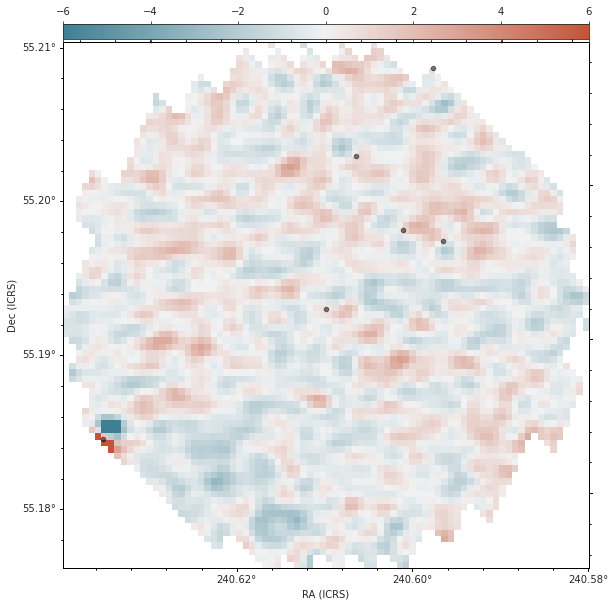

In [43]:
figs,fig=xidplus.plot_Bayes_pval_map([prior], posterior_old)

In [44]:
print('predicted flux is {}'.format(pred_fluxes[source_num]*1000))

for n in range(len(lofar_xidplus_cat)):
    ferr = lofar_xidplus_cat_old['FErr_LOFAR_150_u'][n] - lofar_xidplus_cat_old['FErr_LOFAR_150_l'][n]
    print('flux is {} +/- {}'.format(lofar_xidplus_cat_old['F_LOFAR_150'][n], ferr/2))

predicted flux is 0.10137736475512969
flux is 0.01570938713848591 +/- 0.007627464365214109
flux is 0.22785459458827972 +/- 0.007460214197635651
flux is 0.1331581324338913 +/- 0.011399850249290466
flux is 0.1651494801044464 +/- 0.007357068359851837
flux is 0.19589489698410034 +/- 0.007444389164447784
flux is 0.9702032804489136 +/- 0.009024947881698608


## See if XID+ can recover the flux of an injected source

In [127]:
fname = '../data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header_model = hdulist[0].header
radim_wcs_model = wcs.WCS(radim_header).celestial
radim_data_model = hdulist[0].data[0][0].astype('f4')*1000 #convert to mJy
hdulist.close()
radim_header_model['NAXIS']=2
radim_header_model['WCSAXES']=2

for n in ['3','4']:
    for val in ['RPIX','DELT','UNIT','TYPE','RVAL']:
        try:
            radim_header_model.remove('C{}{}'.format(val,n))
        except:()
radim_header_model.remove('NAXIS3')
radim_header_model.remove('NAXIS4')
radim_header_model['NAXIS']=2
radim_header_model['WCSAXES']=2

radim_data_model = radim_data_model*0

In [168]:
pixxs = np.random.randint(0,radim_header['NAXIS1'],10000)
pixys = np.random.randint(0,radim_header['NAXIS2'],10000)
injected_fluxes = np.linspace(-1,2,int(len(pixxs)/100))
ra_model,dec_model = radim_wcs_model.wcs_pix2world(pixxs,pixys,0,ra_dec_order=True)

col_ra = Column(name='RA_injected',data=ra_model)
col_dec = Column(name='DEC_injected',data=dec_model)
col_ID = Column(name='ID',data=np.arange(0,len(ra_model),1))

fluxes = np.zeros(len(pixxs))

radim_data_model = radim_data_model*0
for n in range(len(injected_fluxes)):
    nmin = int(len(pixxs)/len(injected_fluxes)*n)
    nmax = int(len(pixxs)/len(injected_fluxes)*(n+1))
    fluxes[nmin:nmax] = injected_fluxes[n]
    radim_data_model[pixys[nmin:nmax],pixxs[nmin:nmax]] = radim_data_model[pixys[nmin:nmax],pixxs[nmin:nmax]] + 10**(injected_fluxes[n])

col_flux = Column(name='flux_injected',data=fluxes)

injected_table = Table()
injected_table.add_columns([col_ID,col_ra,col_dec,col_flux])
from astropy.io import registry
from astropy.table.info import serialize_method_as
with serialize_method_as(injected_table, None):
            registry.write(injected_table,'data/injected_source_cat.fits',format='fits',overwrite=True)
    
convolved_data_model = convolve2d(radim_data_model,psf_dirty[0])

hdulist[0].data = convolved_data_model[40:-40,40:-40] + radim_data
hdulist.writeto('data/injected_source_radio_map.fits',overwrite=True)

OSError: File 'data/injected_source_radio_map.fits' already exists.

In [116]:
print(np.sum(np.isnan(radim_data_model)))
radim_data_model = radim_data_model*0
print(np.sum(np.isnan(radim_data_model)))
print(np.sum(np.isnan(convolved_data_model)))

56216115
56216115
60587715


245.21219142734634 54.35056565090292
1.6297508346206444


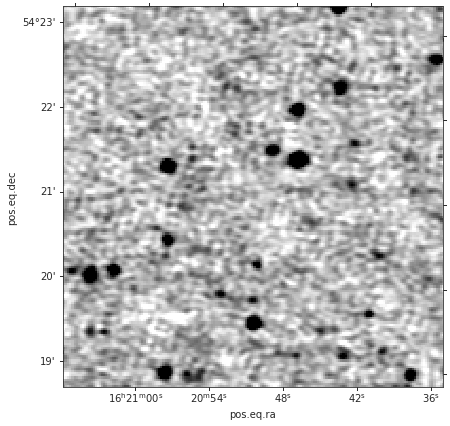

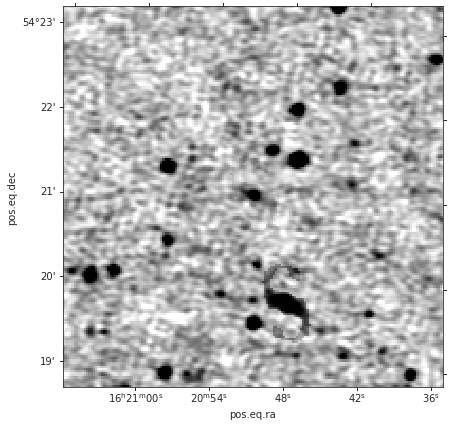

In [175]:
plot_params = {'marker':['o','+','o','v','X','d'],
              'col':['green','cyan','orange','red'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False,False]}
n=4001
n_size = 180
fig = plt.figure(figsize=[7,7])
ra = ra_model[n]
dec = dec_model[n]
print(ra,dec)
print(10**injected_fluxes[int(n/100)])
box_length = 1.5/3600*n_size

wcs_plot,ax = image_plotting.image_plot(radim_data,ra,dec,radim_wcs,box_length,fig)
#wcs_plot,ax = image_plotting.image_plot(mask_deconv,ra,dec,mask_deconv_wcs,box_length,fig)
#plt.contour(prf.array,color='red')
plt.show()

fig = plt.figure(figsize=[7,7])
wcs_plot_injected,ax1 = image_plotting.image_plot(convolved_data_model[40:-40,40:-40] + radim_data,ra,dec,radim_wcs_model,box_length,fig)
#wcs_plot,ax = image_plotting.image_plot(mask_deconv,ra,dec,mask_deconv_wcs,box_length,fig)
#plt.contour(prf.array,color='red')
plt.show()

In [135]:
wcs_plot,ax = image_plotting.image_plot(radim_data,ra,dec,radim_wcs,box_length,fig)
#wcs_plot,ax = image_plotting.image_plot(mask_deconv,ra,dec,mask_deconv_wcs,box_length,fig)
#plt.contour(prf.array,color='red')
plt.show()

## Run XIDPLUS on teh injected sources as Apollo2 is to slow and has memory problems

In [ ]:

lofar_orig = Table.read('../data/data_release/final_component_catalogue-v1.0.fits')

fname = 'data/injected_source_radio_map.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data #convert to mJy
hdulist.close()
radim_header['NAXIS']=2
radim_header['WCSAXES']=2

fname = '../data/data_release/radio_rms_image.fits'
hdulist = fits.open(fname)
radim_header_err = hdulist[0].header
radim_wcs_err = wcs.WCS(radim_header_err).celestial
radim_err = hdulist[0].data[0][0].astype('f4')*1000 #convert to mJy
hdulist.close()


'''for n in ['3','4']:
    for val in ['RPIX','DELT','UNIT','TYPE','RVAL']:
        try:
            radim_header.remove('C{}{}'.format(val,n))
        except:()
radim_header.remove('NAXIS3')
radim_header.remove('NAXIS4')
radim_header['NAXIS']=2
radim_header['WCSAXES']=2'''

#generate a psf for the first object in the catalogue 

n_size = 101
FWHM_factor = 2*np.sqrt(2*np.log(2))
sig_maj = 4/FWHM_factor#/2.355


prf = Gaussian2DKernel(sig_maj,x_size=n_size,y_size=n_size)
prf.normalize(mode='peak')

ras_old = lofar_orig['RA']
decs_old = lofar_orig['DEC']
ids_old = lofar_orig['Component_Name']

injected_cat = Table.read('data/injected_source_cat.fits')

ras_new = injected_cat['RA_injected']
decs_new = injected_cat['DEC_injected']
ids_new = np.arange(0,len(ras_new),1)

ras_all = np.append(ras_new,ras_old.data.data)
decs_all = np.append(decs_new,decs_old.data.data)
ids_all = np.append(ids_new,ids_old.data.data).astype(str)

for n in range(len(injected_cat)):
    if n%100==0:
        print(n)
    print(n)
    ras = ras_new[n:n+1]
    decs = decs_new[n:n+1]
    ID = ids_new[n:n+1]

    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(ra=ras*u.degree, dec=decs*u.degree)  
    import pymoc
    moc = pymoc.util.catalog.catalog_to_moc(c,60,15)


    #create a cutout of the map around the centre cooridnate to speed up creation of the prior class
    size = 120
    cutout = Cutout2D(radim_data,c,size,wcs=radim_wcs,copy=True) 
    im_data = cutout.data.astype('f4')
    im_wcs = cutout.wcs
    im_header = im_wcs.to_header()
    im_header['NAXIS'] = 2
    im_header['NAXIS1'] = im_wcs.pixel_shape[0]
    im_header['NAXIS2'] = im_wcs.pixel_shape[1]

    cutout = Cutout2D(radim_err,c,size,wcs=radim_wcs,copy=True) 
    im_err = cutout.data.astype('f4')


    prior=xidplus.prior(im_data,im_err,im_header,im_header, moc=moc)#Initialise with map, uncertianty map, wcs info and primary header
    prior.prior_cat(ras_all,decs_all,'prior_cat',ID=ids_all,moc=moc)#Set input catalogue
    prior.prior_bkg(-5.0,5)#Set prior on background (assumes Gaussian pdf with mu and sigma)

    psf_dirty,coords,_ = pickle.load(open('data/PSF_coords.pkl','rb'))

    prfs = []
    pinds = []

    for m in range(len(prior.sra)):
        if 'ILTJ' in prior.ID[m]:
            prfs.append(prf_true.array)

        else:
            prfs.append(psf_dirty[0])

        pinds.append(np.arange(0,prfs[m].shape[0],1))


    prior.set_prfs(prfs,pinds,pinds)

    prior.get_pointing_matrix_multiple_prf()
    prior.upper_lim_map()


    from xidplus.numpyro_fit import LOFAR150
    fit=LOFAR150.LOFAR_150(prior,num_samples=1000,num_warmup=1000)
    samples = fit.get_samples()['src_f']
    posterior = xidplus.posterior_numpyro(fit,[prior])

    if os.path.exists('data/xidplus_results/injected_sources/xidplus_run_{}'.format(n))==True:()
    else:
        os.mkdir('data/xidplus_results/injected_sources/xidplus_run_{}'.format(n))

    xidplus.save([prior],posterior,'data/xidplus_results/injected_sources/xidplus_run_{}/injected_sources_{}.pkl'.format(n,n))

    LOFAR_cat=cat.create_LOFAR_cat(posterior,prior)
    LOFAR_cat = Table.read(LOFAR_cat)

    with serialize_method_as(LOFAR_cat, None):
                registry.write(LOFAR_cat,'data/xidplus_results/injected_sources/xidplus_run_{}/injected_sources_cat_{}.fits'.format(n,n),format='fits',overwrite=True)

  'HZ' -> 'Hz'. [astropy.wcs.wcs]
  'HZ' -> 'Hz'.


0
0
Number of divergences: 0


1
Number of divergences: 0


2
Number of divergences: 0


3
Number of divergences: 0


4
Number of divergences: 0


5
Number of divergences: 0


6
Number of divergences: 0


7
Number of divergences: 0


8
Number of divergences: 0


9
Number of divergences: 0


10
Number of divergences: 0


11
Number of divergences: 0


12
Number of divergences: 0


13
Number of divergences: 0


14
Number of divergences: 0


15
Number of divergences: 0


16
Number of divergences: 0


17
Number of divergences: 0


18
Number of divergences: 0


19
Number of divergences: 0


20
Number of divergences: 0


21
Number of divergences: 0


22
Number of divergences: 0


23
Number of divergences: 0


24
Number of divergences: 0


25
Number of divergences: 0


26
Number of divergences: 0


27
Number of divergences: 0


28
Number of divergences: 0


29
Number of divergences: 0


30
Number of divergences: 0


31
Number of divergences: 0


32
Number of divergences: 0


33
Number of divergences: 0


34
Number of divergences: 0


35
Number of divergences: 0


36
Number of divergences: 0


37
Number of divergences: 0


38
Number of divergences: 0


39
Number of divergences: 0


40
Number of divergences: 0


41
Number of divergences: 0


42
Number of divergences: 0


43
Number of divergences: 0


44
Number of divergences: 0


45
Number of divergences: 0


46
Number of divergences: 0


47
Number of divergences: 0


48
Number of divergences: 0


49
Number of divergences: 0


50
Number of divergences: 0


51
Number of divergences: 0


52
Number of divergences: 0


53
Number of divergences: 0


54
Number of divergences: 0


55
Number of divergences: 0


56
Number of divergences: 0


57
Number of divergences: 0


58
Number of divergences: 0


59
Number of divergences: 0


60
Number of divergences: 0


61
Number of divergences: 0


62
Number of divergences: 0


63
Number of divergences: 0


64
Number of divergences: 0


65
Number of divergences: 0


66
Number of divergences: 0


67
Number of divergences: 0


68
Number of divergences: 0


69
Number of divergences: 0


70
Number of divergences: 0


71
Number of divergences: 0


72
Number of divergences: 0


73
Number of divergences: 0


74
Number of divergences: 0


75
Number of divergences: 0


76
Number of divergences: 0


77
Number of divergences: 0


78
Number of divergences: 0


79
Number of divergences: 0


80
Number of divergences: 0


81
Number of divergences: 0


82
Number of divergences: 0


83
Number of divergences: 0


84
Number of divergences: 0


85
Number of divergences: 0


86
Number of divergences: 0


87
Number of divergences: 0


88
Number of divergences: 0


89
Number of divergences: 0


90
Number of divergences: 0


91
Number of divergences: 0


92
Number of divergences: 0


93
Number of divergences: 0


94
Number of divergences: 0


95
Number of divergences: 0


96
Number of divergences: 0


97
Number of divergences: 0


98
Number of divergences: 0


99
Number of divergences: 0


100
100
Number of divergences: 0


101
Number of divergences: 0


102
Number of divergences: 0


103
Number of divergences: 0


104
Number of divergences: 0


105
Number of divergences: 0


106
Number of divergences: 0


107
Number of divergences: 0


108
Number of divergences: 0


109
Number of divergences: 0


110
Number of divergences: 0


111
Number of divergences: 0


112
Number of divergences: 0


113
Number of divergences: 0


114
Number of divergences: 0


115
Number of divergences: 0


116
Number of divergences: 0


117
Number of divergences: 0


118
Number of divergences: 0


119
Number of divergences: 0


120
Number of divergences: 0


121
Number of divergences: 0


122
Number of divergences: 0


123
Number of divergences: 0


124
Number of divergences: 0


125
Number of divergences: 0


126
Number of divergences: 0


127
Number of divergences: 0


128
Number of divergences: 0


129
Number of divergences: 0


130
Number of divergences: 0


131
Number of divergences: 0


132
Number of divergences: 0


133
Number of divergences: 0


134
Number of divergences: 0


135
Number of divergences: 0


136
Number of divergences: 0


137
Number of divergences: 0


138
Number of divergences: 0


139
Number of divergences: 0


140
Number of divergences: 0


141
Number of divergences: 0


142
Number of divergences: 0


143
Number of divergences: 0


144
Number of divergences: 0


145
Number of divergences: 0


146
Number of divergences: 0


147
Number of divergences: 0


148
Number of divergences: 0


149
Number of divergences: 0


150
Number of divergences: 0


151
Number of divergences: 0


152
Number of divergences: 0


153
Number of divergences: 0


154
Number of divergences: 0


155
Number of divergences: 0


156
Number of divergences: 0


157
Number of divergences: 0


158
Number of divergences: 0


159
Number of divergences: 0


160
Number of divergences: 0


161
Number of divergences: 0


162
Number of divergences: 0


163
Number of divergences: 0


164
Number of divergences: 0


165
Number of divergences: 0


166
Number of divergences: 0


167
Number of divergences: 0


168
Number of divergences: 0


169
Number of divergences: 0


170
Number of divergences: 0


171
Number of divergences: 0


172
Number of divergences: 0


173
Number of divergences: 0


174
Number of divergences: 0


175
Number of divergences: 0


176
Number of divergences: 0


177
Number of divergences: 0


178
Number of divergences: 0


179
Number of divergences: 0


180
Number of divergences: 0


181
Number of divergences: 0


182
Number of divergences: 0


183
Number of divergences: 0


184
Number of divergences: 0


185
Number of divergences: 0


186
Number of divergences: 0


187
Number of divergences: 0


188
Number of divergences: 0


189
Number of divergences: 0


190
Number of divergences: 0


191
Number of divergences: 0


192
Number of divergences: 0


193
Number of divergences: 0


194
Number of divergences: 0


195
Number of divergences: 0


196
Number of divergences: 0


197
Number of divergences: 0


198
Number of divergences: 0


199
Number of divergences: 0


200
200
Number of divergences: 0


201
Number of divergences: 0


202
Number of divergences: 0


203
Number of divergences: 0


204
Number of divergences: 0


205
Number of divergences: 0


206
Number of divergences: 0


207
Number of divergences: 0


208
Number of divergences: 0


209
Number of divergences: 0


210
Number of divergences: 0


211
Number of divergences: 0


212
Number of divergences: 0


213
Number of divergences: 0


214
Number of divergences: 0


215
Number of divergences: 0


216
Number of divergences: 0


217
Number of divergences: 0


218
Number of divergences: 0


219
Number of divergences: 0


220
Number of divergences: 0


221
Number of divergences: 0


222
Number of divergences: 0


223
Number of divergences: 0


224
Number of divergences: 0


225
Number of divergences: 0


226
Number of divergences: 0


227
Number of divergences: 0


228
Number of divergences: 0


229
Number of divergences: 0


230
Number of divergences: 0


231
Number of divergences: 0


232
Number of divergences: 0


233
Number of divergences: 0


234
Number of divergences: 0


235
Number of divergences: 0


236
Number of divergences: 0


237
Number of divergences: 0


238
Number of divergences: 0


239
Number of divergences: 0


240
Number of divergences: 0


241
Number of divergences: 0


242
Number of divergences: 0


243
Number of divergences: 0


244
Number of divergences: 0


245
Number of divergences: 0


246
Number of divergences: 0


247
Number of divergences: 0


248
Number of divergences: 0


249
Number of divergences: 0


250
Number of divergences: 0


251
Number of divergences: 0


252
Number of divergences: 0


253
Number of divergences: 0


254
Number of divergences: 0


255
Number of divergences: 0


256
Number of divergences: 0


257
Number of divergences: 0


258
Number of divergences: 0


259
Number of divergences: 0


260
Number of divergences: 0


261
Number of divergences: 0


262
Number of divergences: 0


263
Number of divergences: 0


264
Number of divergences: 0


265
Number of divergences: 0


266
Number of divergences: 0


267
Number of divergences: 0


268
Number of divergences: 0


269
Number of divergences: 0


270
Number of divergences: 0


271
Number of divergences: 0


272
Number of divergences: 0


273
Number of divergences: 0


274
Number of divergences: 0


275
Number of divergences: 0


276
Number of divergences: 0


277
Number of divergences: 0


278
Number of divergences: 0


279
Number of divergences: 0


280
Number of divergences: 0


281
Number of divergences: 0


282
Number of divergences: 0


283
Number of divergences: 0


284
Number of divergences: 0


285
Number of divergences: 0


286
Number of divergences: 0


287
Number of divergences: 0


288
Number of divergences: 0


289
Number of divergences: 0


290
Number of divergences: 0


291
Number of divergences: 0


292
Number of divergences: 0


293
Number of divergences: 0


294
Number of divergences: 0


295
Number of divergences: 0


296
Number of divergences: 0


297
Number of divergences: 0


298
Number of divergences: 0


299
Number of divergences: 0


300
300
Number of divergences: 0


301
Number of divergences: 0


302
Number of divergences: 0


303
Number of divergences: 0


304
Number of divergences: 0


305
Number of divergences: 0


306
Number of divergences: 0


307
Number of divergences: 0


308
Number of divergences: 0


309
Number of divergences: 0


310
Number of divergences: 0


311
Number of divergences: 0


312
Number of divergences: 0


313
Number of divergences: 0


314
Number of divergences: 0


315
Number of divergences: 0


316
Number of divergences: 0


317
Number of divergences: 0


318
Number of divergences: 0


319
Number of divergences: 0


320
Number of divergences: 0


321
Number of divergences: 0


322
Number of divergences: 0


323
Number of divergences: 0


324
Number of divergences: 0


325
Number of divergences: 0


326
Number of divergences: 0


327
Number of divergences: 0


328
Number of divergences: 0


329
Number of divergences: 0


330
Number of divergences: 0


331
Number of divergences: 0


332
Number of divergences: 0


333
Number of divergences: 0


334
Number of divergences: 0


335
Number of divergences: 0


336
Number of divergences: 0


337
Number of divergences: 0


338
Number of divergences: 0


339
Number of divergences: 0


340
Number of divergences: 0


341
Number of divergences: 0


342
Number of divergences: 0


343
Number of divergences: 0


344
Number of divergences: 0


345
Number of divergences: 0


346
Number of divergences: 0


347
Number of divergences: 0


348
Number of divergences: 0


349
Number of divergences: 0


350
Number of divergences: 0


351
Number of divergences: 0


352
Number of divergences: 0


353
Number of divergences: 0


354
Number of divergences: 0


355
Number of divergences: 0


356
Number of divergences: 0


357
Number of divergences: 0


358
Number of divergences: 0


359
Number of divergences: 0


360
Number of divergences: 0


361
Number of divergences: 0


362
Number of divergences: 0


363
Number of divergences: 0


364
Number of divergences: 0


365
Number of divergences: 0


366
Number of divergences: 0


367
Number of divergences: 0


368
Number of divergences: 0


369
Number of divergences: 0


370
Number of divergences: 0


371
Number of divergences: 0


372
Number of divergences: 0


373
Number of divergences: 0


374
Number of divergences: 0


375
Number of divergences: 0


376
Number of divergences: 0


377
Number of divergences: 0


378
Number of divergences: 0


379
Number of divergences: 0


380
Number of divergences: 0


381
Number of divergences: 0


382
Number of divergences: 0


383
Number of divergences: 0


384
Number of divergences: 0


385
Number of divergences: 0


386
Number of divergences: 0


387
Number of divergences: 0


388
Number of divergences: 0


389
Number of divergences: 0


390
Number of divergences: 0


391
Number of divergences: 0


392
Number of divergences: 0


393
Number of divergences: 0


394
Number of divergences: 0


395
Number of divergences: 0


396
Number of divergences: 0


397
Number of divergences: 0


398
Number of divergences: 0


399
Number of divergences: 0


400
400
Number of divergences: 0


401
Number of divergences: 0


402
Number of divergences: 0


403
Number of divergences: 0


404
Number of divergences: 0


405
Number of divergences: 0


406
Number of divergences: 0


407
Number of divergences: 0


408
Number of divergences: 0


409
Number of divergences: 0


410
Number of divergences: 0


411
Number of divergences: 0


412
Number of divergences: 0


413
Number of divergences: 0


414
Number of divergences: 0


415
Number of divergences: 0


416
Number of divergences: 0


417
Number of divergences: 0


418
Number of divergences: 0


419
Number of divergences: 0


420
Number of divergences: 0


421
Number of divergences: 0


422
Number of divergences: 0


423
Number of divergences: 0


424
Number of divergences: 0


425
Number of divergences: 0


426
Number of divergences: 0


427
Number of divergences: 0


428
Number of divergences: 0


429
Number of divergences: 0


430
Number of divergences: 0


431
Number of divergences: 0


432
Number of divergences: 1


433
Number of divergences: 0


434
Number of divergences: 0


435
Number of divergences: 0


436
Number of divergences: 0


437
Number of divergences: 0


438
Number of divergences: 0


439
Number of divergences: 0


440
Number of divergences: 0


441
Number of divergences: 0


442
Number of divergences: 0


443
Number of divergences: 0


444
Number of divergences: 0


445
Number of divergences: 0


446
Number of divergences: 0


447
Number of divergences: 0


448
Number of divergences: 0


449
Number of divergences: 0


450
Number of divergences: 0


451
Number of divergences: 0


452
Number of divergences: 0


453
Number of divergences: 0


454
Number of divergences: 0


455
Number of divergences: 0


456
Number of divergences: 0


457
Number of divergences: 0


458
Number of divergences: 0


459
Number of divergences: 0


460
Number of divergences: 0


461
Number of divergences: 0


462
Number of divergences: 0


463
Number of divergences: 0


464
Number of divergences: 0


465
Number of divergences: 0


466
Number of divergences: 0


467
Number of divergences: 0


468
Number of divergences: 0


469
Number of divergences: 0


470
Number of divergences: 0


471
Number of divergences: 0


472
Number of divergences: 0


473
Number of divergences: 0


474
Number of divergences: 0


475
Number of divergences: 0


476
Number of divergences: 0


477
Number of divergences: 0


478
Number of divergences: 0


479
Number of divergences: 0


480
Number of divergences: 0


481
Number of divergences: 0


482
Number of divergences: 0


483
Number of divergences: 0


484
Number of divergences: 0


485
Number of divergences: 0


486
Number of divergences: 0


487
Number of divergences: 0


488
Number of divergences: 0


489
Number of divergences: 0


490
Number of divergences: 0


491
Number of divergences: 0


492
Number of divergences: 0


493
Number of divergences: 0


494
Number of divergences: 0


495
Number of divergences: 0


496
Number of divergences: 0


497
Number of divergences: 0


498
Number of divergences: 0


499
Number of divergences: 0


500
500
Number of divergences: 0


501
Number of divergences: 0


502
Number of divergences: 0


503
Number of divergences: 0


504
Number of divergences: 0


505
Number of divergences: 0


506
Number of divergences: 0


507
Number of divergences: 0


508
Number of divergences: 0


509
Number of divergences: 0


510
Number of divergences: 0


511
Number of divergences: 0


512
Number of divergences: 0


513
Number of divergences: 0


514
Number of divergences: 0


515
Number of divergences: 0


516
Number of divergences: 0


517
Number of divergences: 0


518
Number of divergences: 0


519
Number of divergences: 0


520
Number of divergences: 0


521
Number of divergences: 0


522
Number of divergences: 0


523
Number of divergences: 0


524
Number of divergences: 0


525
Number of divergences: 0


526
Number of divergences: 0


527
Number of divergences: 0


528
Number of divergences: 0


529
Number of divergences: 0


530
Number of divergences: 0


531
Number of divergences: 0


532
Number of divergences: 0


533
Number of divergences: 0


534
Number of divergences: 0


535
Number of divergences: 0


536
Number of divergences: 0


537
Number of divergences: 0


538
Number of divergences: 0


539
Number of divergences: 0


540
Number of divergences: 0


541
Number of divergences: 0


542
Number of divergences: 0


543
Number of divergences: 0


544
Number of divergences: 0


545
Number of divergences: 0


546
Number of divergences: 0


547
Number of divergences: 0


548
Number of divergences: 0


549
Number of divergences: 0


550
Number of divergences: 0


551
Number of divergences: 0


552
Number of divergences: 0


553
Number of divergences: 0


554
Number of divergences: 0


555
Number of divergences: 0


556
Number of divergences: 0


557
Number of divergences: 0


558
Number of divergences: 0


559
Number of divergences: 0


560
Number of divergences: 0


561
Number of divergences: 0


562
Number of divergences: 0


563
Number of divergences: 0


564
Number of divergences: 0


565
Number of divergences: 0


566
Number of divergences: 0


567
Number of divergences: 0


568
Number of divergences: 0


569
Number of divergences: 0


570
Number of divergences: 0


571
Number of divergences: 0


572
Number of divergences: 0


573
Number of divergences: 0


574
Number of divergences: 0


575
Number of divergences: 0


576
Number of divergences: 0


577
Number of divergences: 0


578
Number of divergences: 0


579
Number of divergences: 0


580
Number of divergences: 0


581
Number of divergences: 0


582
Number of divergences: 0


583
Number of divergences: 0


584
Number of divergences: 0


585
Number of divergences: 0


586
Number of divergences: 0


587
Number of divergences: 0


588
Number of divergences: 0


589
Number of divergences: 0


590
Number of divergences: 0


591
Number of divergences: 0


592
Number of divergences: 0


593
Number of divergences: 0


594
Number of divergences: 0


595
Number of divergences: 0


596
Number of divergences: 0


597
Number of divergences: 0


598
Number of divergences: 0


599
Number of divergences: 0


600
600
Number of divergences: 0


601
Number of divergences: 0


602
Number of divergences: 0


603
Number of divergences: 0


604
Number of divergences: 0


605
Number of divergences: 0


606
Number of divergences: 0


607
Number of divergences: 0


608
Number of divergences: 0


609
Number of divergences: 0


610
Number of divergences: 0


611
Number of divergences: 0


612
Number of divergences: 0


613
Number of divergences: 0


614
Number of divergences: 0


615
Number of divergences: 0


616
Number of divergences: 0


617
Number of divergences: 0


618
Number of divergences: 0


619
Number of divergences: 0


620
Number of divergences: 0


621
Number of divergences: 0


622
Number of divergences: 0


623
Number of divergences: 0


624
Number of divergences: 0


625
Number of divergences: 0


626
Number of divergences: 0


627
Number of divergences: 0


628
Number of divergences: 0


629
Number of divergences: 0


630
Number of divergences: 0


631
Number of divergences: 0


632
Number of divergences: 0


633
Number of divergences: 0


634
Number of divergences: 0


635
Number of divergences: 0


636
Number of divergences: 0


637
Number of divergences: 0


638
Number of divergences: 0


639
Number of divergences: 0


640
Number of divergences: 0


641
Number of divergences: 0


642
Number of divergences: 0


643
Number of divergences: 0


644
Number of divergences: 0


645
Number of divergences: 0


646
Number of divergences: 0


647
Number of divergences: 0


648
Number of divergences: 0


649
Number of divergences: 0


650
Number of divergences: 0


651
Number of divergences: 0


652
Number of divergences: 0


653
Number of divergences: 0


654
Number of divergences: 0


655
Number of divergences: 0


656
Number of divergences: 0


657
Number of divergences: 0


658
Number of divergences: 0


659
Number of divergences: 0


660
Number of divergences: 0


661
Number of divergences: 0


662
Number of divergences: 0


663
Number of divergences: 0


664
Number of divergences: 0


665
Number of divergences: 0


666
Number of divergences: 0


667
Number of divergences: 0


668
Number of divergences: 0


669
Number of divergences: 0


670
Number of divergences: 0


671
Number of divergences: 0


672
Number of divergences: 0


673
Number of divergences: 0


674
Number of divergences: 0


675
Number of divergences: 0


676
Number of divergences: 0


677
Number of divergences: 0


678
Number of divergences: 0


679
Number of divergences: 0


680
Number of divergences: 0


681
Number of divergences: 0


682
Number of divergences: 0


683
Number of divergences: 0


684
Number of divergences: 0


685
Number of divergences: 0


686
Number of divergences: 0


687
Number of divergences: 0


688
Number of divergences: 0


689
Number of divergences: 0


690
Number of divergences: 0


691
Number of divergences: 0


692
Number of divergences: 0


693
Number of divergences: 0


694
Number of divergences: 0


695
Number of divergences: 0


696
Number of divergences: 0


697
Number of divergences: 0


698
Number of divergences: 0


699
Number of divergences: 0


700
700
Number of divergences: 0


701
Number of divergences: 0


702
Number of divergences: 0


703
Number of divergences: 0


704
Number of divergences: 0


705
Number of divergences: 0


706
Number of divergences: 0


707
Number of divergences: 0


708
Number of divergences: 0


709
Number of divergences: 0


710
Number of divergences: 0


711
Number of divergences: 0


712
Number of divergences: 0


713
Number of divergences: 0


714
Number of divergences: 0


715
Number of divergences: 0


716
Number of divergences: 0


717
Number of divergences: 0


718
Number of divergences: 0


719
Number of divergences: 0


720
Number of divergences: 0


721
Number of divergences: 0


722
Number of divergences: 0


723
Number of divergences: 0


724
Number of divergences: 0


725
Number of divergences: 0


726
Number of divergences: 0


727
Number of divergences: 0


728
Number of divergences: 0


729
Number of divergences: 0


730
Number of divergences: 0


731
Number of divergences: 0


732
Number of divergences: 0


733
Number of divergences: 0


734
Number of divergences: 0


735
Number of divergences: 0


736
Number of divergences: 0


737
Number of divergences: 0


738
Number of divergences: 0


739
Number of divergences: 0


740
Number of divergences: 0


741
Number of divergences: 0


742
Number of divergences: 0


743
Number of divergences: 0


744
Number of divergences: 0


745
Number of divergences: 0


746
Number of divergences: 0


747
Number of divergences: 0


748
Number of divergences: 0


749
Number of divergences: 0


750
Number of divergences: 0


751
Number of divergences: 0


752
Number of divergences: 0


753
Number of divergences: 0


754
Number of divergences: 0


755
Number of divergences: 0


756
Number of divergences: 0


757
Number of divergences: 0


758
Number of divergences: 0


759
Number of divergences: 0


760
Number of divergences: 0


761
Number of divergences: 0


762
Number of divergences: 0


763
Number of divergences: 0


764
Number of divergences: 0


765
Number of divergences: 0


766
Number of divergences: 0


767
Number of divergences: 0


768
Number of divergences: 0


769
Number of divergences: 0


770
Number of divergences: 0


771
Number of divergences: 0


772
Number of divergences: 0


773
Number of divergences: 0


774
Number of divergences: 0


775
Number of divergences: 0


776
Number of divergences: 0


777
Number of divergences: 0


778
Number of divergences: 0


779
Number of divergences: 0


780
Number of divergences: 0


781
Number of divergences: 0


782
Number of divergences: 0


783
Number of divergences: 0


784
Number of divergences: 0


785
Number of divergences: 0


786
Number of divergences: 0


787
Number of divergences: 0


788
Number of divergences: 0


789
Number of divergences: 0


790
Number of divergences: 0


791
Number of divergences: 0


792
Number of divergences: 0


793
Number of divergences: 0


794
Number of divergences: 0


795
Number of divergences: 0


796
Number of divergences: 0


797
Number of divergences: 0


798
Number of divergences: 0


799
Number of divergences: 0


800
800
Number of divergences: 0


801
Number of divergences: 0


802
Number of divergences: 0


803
Number of divergences: 0


804
Number of divergences: 0


805
Number of divergences: 0


806
Number of divergences: 0


807
Number of divergences: 0


808
Number of divergences: 0


809
Number of divergences: 0


810
Number of divergences: 0


811
Number of divergences: 0


812
Number of divergences: 0


813
Number of divergences: 0


814
Number of divergences: 0


815
Number of divergences: 0


816
Number of divergences: 0


817
Number of divergences: 0


818
Number of divergences: 0


819
Number of divergences: 0


820
Number of divergences: 0


821
Number of divergences: 0


822
Number of divergences: 0


823
Number of divergences: 0


824
Number of divergences: 0


825
Number of divergences: 0


826
Number of divergences: 0


827
Number of divergences: 0


828
Number of divergences: 0


829
Number of divergences: 0


830
Number of divergences: 0


831
Number of divergences: 0


832
Number of divergences: 0


833
Number of divergences: 0


834
Number of divergences: 0


835
Number of divergences: 0


836
Number of divergences: 0


837
Number of divergences: 0


838
Number of divergences: 0


839
Number of divergences: 0


840
Number of divergences: 0


841
Number of divergences: 0


842
Number of divergences: 0


843
Number of divergences: 0


844
Number of divergences: 0


845
Number of divergences: 0


846
Number of divergences: 0


847
Number of divergences: 0


848
Number of divergences: 0


849
Number of divergences: 0


850
Number of divergences: 0


851
Number of divergences: 0


852
Number of divergences: 0


853
Number of divergences: 0


854
Number of divergences: 0


855
Number of divergences: 0


856
Number of divergences: 0


857
Number of divergences: 0


858
Number of divergences: 0


859
Number of divergences: 0


860
Number of divergences: 0


861
Number of divergences: 0


862
Number of divergences: 0


863
Number of divergences: 0


864
Number of divergences: 0


865
Number of divergences: 0


866
Number of divergences: 0


867
Number of divergences: 0


868
Number of divergences: 0


869
Number of divergences: 0


870
Number of divergences: 0


871
Number of divergences: 0


872
Number of divergences: 0


873
Number of divergences: 0


874
Number of divergences: 0


875
Number of divergences: 0


876
Number of divergences: 0


877
Number of divergences: 0


878
Number of divergences: 0


879
Number of divergences: 0


880
Number of divergences: 0


881
Number of divergences: 0


882
Number of divergences: 0


883
Number of divergences: 0


884
Number of divergences: 0


885
Number of divergences: 0


886
Number of divergences: 0


887
Number of divergences: 0


888
Number of divergences: 0


889
Number of divergences: 0


890
Number of divergences: 0


891
Number of divergences: 0


892
Number of divergences: 0


893
Number of divergences: 0


894
Number of divergences: 0


895
Number of divergences: 0


896
Number of divergences: 0


897
Number of divergences: 0


898
Number of divergences: 0


899
Number of divergences: 0


900
900
Number of divergences: 0


901
Number of divergences: 0


902
Number of divergences: 0


903
Number of divergences: 0


904
Number of divergences: 0


905
Number of divergences: 0


906
Number of divergences: 0


907
Number of divergences: 0


908
Number of divergences: 0


909
Number of divergences: 0


910
Number of divergences: 0


911
Number of divergences: 0


912
Number of divergences: 0


913
Number of divergences: 0


914
Number of divergences: 0


915
Number of divergences: 0


916
Number of divergences: 0


917
Number of divergences: 0


918
Number of divergences: 0


919
Number of divergences: 0


920
Number of divergences: 0


921
Number of divergences: 0


922
Number of divergences: 0


923
Number of divergences: 0


924
Number of divergences: 0


925
Number of divergences: 0


926
Number of divergences: 0


927
Number of divergences: 0


928
Number of divergences: 0


929
Number of divergences: 0


930
Number of divergences: 0


931
Number of divergences: 0


932
Number of divergences: 0


933
Number of divergences: 0


934
Number of divergences: 0


935
Number of divergences: 0


936
Number of divergences: 0


937
Number of divergences: 0


938
Number of divergences: 0


939
Number of divergences: 0


940
Number of divergences: 0


941
Number of divergences: 0


942
Number of divergences: 0


943
Number of divergences: 0


944
Number of divergences: 0


945
Number of divergences: 0


946
Number of divergences: 0


947
Number of divergences: 0


948
Number of divergences: 0


949
Number of divergences: 0


950
Number of divergences: 0


951
Number of divergences: 0


952
Number of divergences: 0


953
Number of divergences: 0


954
Number of divergences: 0


955
Number of divergences: 0


956
Number of divergences: 0


957
Number of divergences: 0


958
Number of divergences: 0


959
Number of divergences: 0


960
Number of divergences: 0


961
Number of divergences: 0


962
Number of divergences: 0


963
Number of divergences: 0


964
Number of divergences: 0


965
Number of divergences: 0


966
Number of divergences: 0


967
Number of divergences: 0


968
Number of divergences: 0


969
Number of divergences: 0


970
Number of divergences: 0


971
Number of divergences: 0


972
Number of divergences: 0


973
Number of divergences: 0


974
Number of divergences: 0


975
Number of divergences: 0


976
Number of divergences: 0


977
Number of divergences: 0


978
Number of divergences: 0


979
Number of divergences: 0


980
Number of divergences: 0


981
Number of divergences: 0


982
Number of divergences: 0


983
Number of divergences: 0


984
Number of divergences: 0


985
Number of divergences: 0


986
Number of divergences: 0


987
Number of divergences: 0


988
Number of divergences: 0


989
Number of divergences: 0


990
Number of divergences: 0


991
Number of divergences: 0


992
Number of divergences: 0


993
Number of divergences: 0


994
Number of divergences: 0


995
Number of divergences: 0


996
Number of divergences: 0


997
Number of divergences: 0


998
Number of divergences: 0


999
Number of divergences: 0


1000
1000
Number of divergences: 0


1001
Number of divergences: 0


1002
Number of divergences: 0


1003
Number of divergences: 0


1004
Number of divergences: 0


1005
Number of divergences: 0


1006
Number of divergences: 0


1007
Number of divergences: 0


1008
Number of divergences: 0


1009
Number of divergences: 0


1010
Number of divergences: 0


1011
Number of divergences: 0


1012
Number of divergences: 0


1013
Number of divergences: 0


1014
Number of divergences: 0


1015
Number of divergences: 0


1016
Number of divergences: 0


1017
Number of divergences: 0


1018
Number of divergences: 0


1019
Number of divergences: 0


1020
Number of divergences: 0


1021
Number of divergences: 0


1022
Number of divergences: 0


1023
Number of divergences: 0


1024
Number of divergences: 0


1025
Number of divergences: 0


1026
Number of divergences: 0


1027
Number of divergences: 0


1028
Number of divergences: 0


1029
Number of divergences: 0


1030
Number of divergences: 0


1031
Number of divergences: 0


1032
Number of divergences: 0


1033
Number of divergences: 0


1034
Number of divergences: 0


1035
Number of divergences: 0


1036
Number of divergences: 0


1037
Number of divergences: 0


1038
Number of divergences: 0


1039
Number of divergences: 0


1040
Number of divergences: 0


1041
Number of divergences: 0


1042
Number of divergences: 0


1043
Number of divergences: 0


1044
Number of divergences: 0


1045
Number of divergences: 0


1046
Number of divergences: 0


1047
Number of divergences: 0


1048
Number of divergences: 0


1049
Number of divergences: 0


1050
Number of divergences: 0


1051
Number of divergences: 0


1052
Number of divergences: 0


1053
Number of divergences: 0


1054
Number of divergences: 0


1055
Number of divergences: 0


1056
Number of divergences: 0


1057
Number of divergences: 0


1058
Number of divergences: 0


1059
Number of divergences: 0


1060
Number of divergences: 0


1061
Number of divergences: 0


1062
Number of divergences: 0


1063
Number of divergences: 0


1064
Number of divergences: 0


1065
Number of divergences: 0


1066
Number of divergences: 0


1067
Number of divergences: 0


1068
Number of divergences: 0


1069
Number of divergences: 0


1070
Number of divergences: 0


1071
Number of divergences: 0


1072
Number of divergences: 0


1073
Number of divergences: 0


1074
Number of divergences: 0


1075
Number of divergences: 0


1076
Number of divergences: 0


1077
Number of divergences: 0


1078
Number of divergences: 0


1079
Number of divergences: 0


1080
Number of divergences: 0


1081
Number of divergences: 0


1082
Number of divergences: 0


1083
Number of divergences: 0


1084
Number of divergences: 0


1085
Number of divergences: 0


1086
Number of divergences: 0


1087
Number of divergences: 0


1088
Number of divergences: 0


1089
Number of divergences: 0


1090
Number of divergences: 0


1091
Number of divergences: 0


1092
Number of divergences: 0


1093
Number of divergences: 0


1094
Number of divergences: 0


1095
Number of divergences: 0


1096
Number of divergences: 0


1097
Number of divergences: 0


1098
Number of divergences: 0


1099
Number of divergences: 0


1100
1100
Number of divergences: 0


1101
Number of divergences: 0


1102
Number of divergences: 0


1103
Number of divergences: 0


1104
Number of divergences: 0


1105
Number of divergences: 0


1106
Number of divergences: 0


1107
Number of divergences: 0


1108
Number of divergences: 0


1109
Number of divergences: 0


1110
Number of divergences: 0


1111
Number of divergences: 0


1112
Number of divergences: 0


1113
Number of divergences: 0


1114
Number of divergences: 0


1115
Number of divergences: 0


1116
Number of divergences: 0


1117
Number of divergences: 0


1118
Number of divergences: 0


1119
Number of divergences: 0


1120
Number of divergences: 0


1121
Number of divergences: 0


1122
Number of divergences: 0


1123
Number of divergences: 0


1124
Number of divergences: 0


1125
Number of divergences: 0


1126
Number of divergences: 0


1127
Number of divergences: 0


1128
Number of divergences: 0


1129
Number of divergences: 0


1130
Number of divergences: 0


1131
Number of divergences: 0


1132
Number of divergences: 0


1133
Number of divergences: 0


1134
Number of divergences: 0


1135
Number of divergences: 0


1136
Number of divergences: 0


1137
Number of divergences: 0


1138
Number of divergences: 0


1139
Number of divergences: 0


1140
Number of divergences: 0


1141
Number of divergences: 0


1142
Number of divergences: 0


1143
Number of divergences: 0


1144
Number of divergences: 0


1145
Number of divergences: 0


1146
Number of divergences: 0


1147
Number of divergences: 0


1148
Number of divergences: 0


1149
Number of divergences: 0


1150
Number of divergences: 0


1151
Number of divergences: 0


1152
Number of divergences: 0


1153
Number of divergences: 0


1154
Number of divergences: 0


1155
Number of divergences: 0


1156
Number of divergences: 0


1157
Number of divergences: 0


1158
Number of divergences: 0


1159
Number of divergences: 0


1160
Number of divergences: 0


1161
Number of divergences: 0


1162
Number of divergences: 0


1163
Number of divergences: 0


1164
Number of divergences: 0


1165
Number of divergences: 0


1166
Number of divergences: 0


1167
Number of divergences: 0


1168
Number of divergences: 0


1169
Number of divergences: 0


1170
Number of divergences: 0


1171
Number of divergences: 0


1172
Number of divergences: 0


1173
Number of divergences: 0


1174
Number of divergences: 0


1175
Number of divergences: 0


1176
Number of divergences: 0


1177
Number of divergences: 0


1178
Number of divergences: 0


1179
Number of divergences: 0


1180
Number of divergences: 0


1181
Number of divergences: 0


1182
Number of divergences: 0


1183
Number of divergences: 0


1184
Number of divergences: 0


1185
Number of divergences: 0


1186
Number of divergences: 0


1187
Number of divergences: 0


1188
Number of divergences: 0


1189
Number of divergences: 0


1190
Number of divergences: 0


1191
Number of divergences: 0


1192
Number of divergences: 0


1193
Number of divergences: 0


1194
Number of divergences: 0


1195
Number of divergences: 0


1196
Number of divergences: 0


1197
Number of divergences: 0


1198
Number of divergences: 0


1199
Number of divergences: 0


1200
1200
Number of divergences: 0


1201
Number of divergences: 0


1202
Number of divergences: 0


1203
Number of divergences: 0


1204
Number of divergences: 0


1205
Number of divergences: 0


1206
Number of divergences: 0


1207
Number of divergences: 0


1208
Number of divergences: 0


1209
Number of divergences: 0


1210
Number of divergences: 0


1211
Number of divergences: 0


1212
Number of divergences: 0


1213
Number of divergences: 0


1214
Number of divergences: 0


1215
Number of divergences: 0


1216
Number of divergences: 0


1217
Number of divergences: 0


1218
Number of divergences: 0


1219
Number of divergences: 0


1220
Number of divergences: 0


1221
Number of divergences: 0


1222
Number of divergences: 0


1223
Number of divergences: 0


1224
Number of divergences: 0


1225
Number of divergences: 0


1226
Number of divergences: 0


1227
Number of divergences: 0


1228
Number of divergences: 0


1229
Number of divergences: 0


1230
Number of divergences: 0


1231
Number of divergences: 0


1232
Number of divergences: 0


1233
Number of divergences: 0


1234
Number of divergences: 0


1235
Number of divergences: 0


1236
Number of divergences: 0


1237
Number of divergences: 0


1238
Number of divergences: 0


1239
Number of divergences: 0


1240
Number of divergences: 0


1241
Number of divergences: 0


1242
Number of divergences: 0


1243
Number of divergences: 0


1244
Number of divergences: 0


1245
Number of divergences: 0


1246
Number of divergences: 0


1247
Number of divergences: 0


1248
Number of divergences: 0


1249
Number of divergences: 0


1250
Number of divergences: 0


1251
Number of divergences: 0


1252
Number of divergences: 0


1253
Number of divergences: 0


1254
Number of divergences: 0


1255
Number of divergences: 0


1256
Number of divergences: 0


1257
Number of divergences: 0


1258
Number of divergences: 0


1259
Number of divergences: 0


1260
Number of divergences: 0


1261
Number of divergences: 0


1262
Number of divergences: 0


1263
Number of divergences: 0


1264
Number of divergences: 0


1265
Number of divergences: 0


1266
Number of divergences: 0


1267
Number of divergences: 0


1268
Number of divergences: 0


1269
Number of divergences: 0


1270
Number of divergences: 0


1271
Number of divergences: 0


1272
Number of divergences: 0


1273
Number of divergences: 0


1274
Number of divergences: 0


1275
Number of divergences: 0


1276
Number of divergences: 0


1277
Number of divergences: 0


1278
Number of divergences: 0


1279
Number of divergences: 0


1280
Number of divergences: 0


1281
Number of divergences: 0


1282
Number of divergences: 0


1283
Number of divergences: 0


1284
Number of divergences: 0


1285
Number of divergences: 0


1286
Number of divergences: 0


1287
Number of divergences: 0


1288
Number of divergences: 0


1289
Number of divergences: 0


1290
Number of divergences: 0


1291
Number of divergences: 0


1292
Number of divergences: 0


1293
Number of divergences: 0


1294
Number of divergences: 0


1295
Number of divergences: 0


1296
Number of divergences: 0


1297
Number of divergences: 0


1298
Number of divergences: 0


1299
Number of divergences: 0


1300
1300
Number of divergences: 0


1301
Number of divergences: 0


1302
Number of divergences: 0


1303
Number of divergences: 0


1304
Number of divergences: 0


1305
Number of divergences: 0


1306
Number of divergences: 0


1307
Number of divergences: 0


1308
Number of divergences: 0


1309
Number of divergences: 0


1310
Number of divergences: 0


1311
Number of divergences: 0


1312
Number of divergences: 0


1313
Number of divergences: 0


1314
Number of divergences: 0


1315
Number of divergences: 0


1316
Number of divergences: 0


1317
Number of divergences: 0


1318
Number of divergences: 0


1319
Number of divergences: 0


1320
Number of divergences: 0


1321
Number of divergences: 0


1322
Number of divergences: 0


1323
Number of divergences: 0


1324
Number of divergences: 0


1325
Number of divergences: 0


1326
Number of divergences: 0


1327
Number of divergences: 0


1328
Number of divergences: 0


1329
Number of divergences: 0


1330
Number of divergences: 0


1331
Number of divergences: 0


1332
Number of divergences: 0


1333
Number of divergences: 0


1334
Number of divergences: 0


1335
Number of divergences: 0


1336
Number of divergences: 0


1337
Number of divergences: 0


1338
Number of divergences: 0


1339
Number of divergences: 0


1340
Number of divergences: 0


1341
Number of divergences: 0


1342
Number of divergences: 0


1343
Number of divergences: 0


1344
Number of divergences: 0


1345
Number of divergences: 0


1346
Number of divergences: 0


1347
Number of divergences: 0


1348
Number of divergences: 0


1349
Number of divergences: 0


1350
Number of divergences: 0


1351
Number of divergences: 0


1352
Number of divergences: 0


1353
Number of divergences: 0


1354
Number of divergences: 0


1355
Number of divergences: 0


1356
Number of divergences: 0


1357
Number of divergences: 0


1358
Number of divergences: 0


1359
Number of divergences: 0


1360
Number of divergences: 0


1361
Number of divergences: 0


1362
Number of divergences: 0


1363
Number of divergences: 0


1364
Number of divergences: 0


1365
Number of divergences: 0


1366
Number of divergences: 0


1367
Number of divergences: 0


1368
Number of divergences: 0


1369
Number of divergences: 0


1370
Number of divergences: 0


1371
Number of divergences: 0


1372
Number of divergences: 0


1373
Number of divergences: 0


1374
Number of divergences: 0


1375
Number of divergences: 0


1376
Number of divergences: 0


1377
Number of divergences: 0


1378
Number of divergences: 0


1379
Number of divergences: 0


1380
Number of divergences: 0


1381
Number of divergences: 0


1382
Number of divergences: 0


1383
Number of divergences: 0


1384
Number of divergences: 0


1385
Number of divergences: 0


1386
Number of divergences: 0


1387
Number of divergences: 0


1388
Number of divergences: 0


1389
Number of divergences: 0


1390
Number of divergences: 0


1391
Number of divergences: 0


1392
Number of divergences: 0


1393
Number of divergences: 0


1394
Number of divergences: 0


1395
Number of divergences: 0


1396
Number of divergences: 0


1397
Number of divergences: 0


1398
Number of divergences: 0


1399
Number of divergences: 0


1400
1400
Number of divergences: 0


1401
Number of divergences: 0


1402
Number of divergences: 0


1403
Number of divergences: 0


1404
Number of divergences: 0


1405
Number of divergences: 0


1406
Number of divergences: 0


1407
Number of divergences: 0


1408
Number of divergences: 0


1409
Number of divergences: 0


1410
Number of divergences: 0


1411
Number of divergences: 0


1412
Number of divergences: 0


1413
Number of divergences: 0


1414
Number of divergences: 0


1415
Number of divergences: 0


1416
Number of divergences: 0


1417
Number of divergences: 0


1418
Number of divergences: 0


1419
Number of divergences: 0


1420
Number of divergences: 0


1421
Number of divergences: 0


1422
Number of divergences: 0


1423
Number of divergences: 0


1424
Number of divergences: 0


1425
Number of divergences: 0


1426
Number of divergences: 0


1427
Number of divergences: 0


1428
Number of divergences: 0


1429
Number of divergences: 0


1430
Number of divergences: 0


1431
Number of divergences: 0


1432
Number of divergences: 0


1433
Number of divergences: 0


1434
Number of divergences: 0


1435
Number of divergences: 0


1436
Number of divergences: 0


1437
Number of divergences: 0


1438
Number of divergences: 0


1439
Number of divergences: 0


1440
Number of divergences: 0


1441
Number of divergences: 0


1442
Number of divergences: 0


1443
Number of divergences: 0


1444
Number of divergences: 0


1445
Number of divergences: 0


1446
Number of divergences: 0


1447
Number of divergences: 0


1448
Number of divergences: 0


1449
Number of divergences: 0


1450
Number of divergences: 0


1451
Number of divergences: 0


1452
Number of divergences: 0


1453
Number of divergences: 0


1454
Number of divergences: 0


1455
Number of divergences: 0


1456
Number of divergences: 0


1457
Number of divergences: 0


1458
Number of divergences: 0


1459
Number of divergences: 0


1460
Number of divergences: 0


1461
Number of divergences: 0


1462
Number of divergences: 0


1463
Number of divergences: 0


1464
Number of divergences: 0


1465
Number of divergences: 0


1466
Number of divergences: 0


1467
Number of divergences: 0


1468
Number of divergences: 0


1469
Number of divergences: 0


1470
Number of divergences: 0


1471
Number of divergences: 0


1472
Number of divergences: 0


1473
Number of divergences: 0


1474
Number of divergences: 0


1475
Number of divergences: 0


1476
Number of divergences: 0


1477
Number of divergences: 0


1478
Number of divergences: 0


1479
Number of divergences: 0


1480
Number of divergences: 0


1481
Number of divergences: 0


1482
Number of divergences: 0


1483
Number of divergences: 0


1484
Number of divergences: 0


1485
Number of divergences: 0


1486
Number of divergences: 0


1487
Number of divergences: 0


1488
Number of divergences: 0


1489
Number of divergences: 0


1490
Number of divergences: 0


1491
Number of divergences: 0


1492
Number of divergences: 0


1493
Number of divergences: 0


1494
Number of divergences: 0


1495
Number of divergences: 0


1496
Number of divergences: 0


1497
Number of divergences: 0


1498
Number of divergences: 0


1499
Number of divergences: 0


1500
1500
Number of divergences: 0


1501
Number of divergences: 0


1502
Number of divergences: 0


1503
Number of divergences: 0


1504
Number of divergences: 0


1505
Number of divergences: 0


1506
Number of divergences: 0


1507
Number of divergences: 0


1508
Number of divergences: 0


1509
Number of divergences: 0


1510
Number of divergences: 0


1511
Number of divergences: 0


1512
Number of divergences: 0


1513
Number of divergences: 0


1514
Number of divergences: 0


1515
Number of divergences: 0


1516
Number of divergences: 0


1517
Number of divergences: 0


1518
Number of divergences: 0


1519
Number of divergences: 0


1520
Number of divergences: 0


1521
Number of divergences: 0


1522
Number of divergences: 0


1523
Number of divergences: 0


1524
Number of divergences: 0


1525
Number of divergences: 0


1526
Number of divergences: 0


1527
Number of divergences: 0


1528
Number of divergences: 0


1529
Number of divergences: 0


1530
Number of divergences: 0


1531
Number of divergences: 0


1532
Number of divergences: 0


1533
Number of divergences: 0


1534
Number of divergences: 0


1535
Number of divergences: 0


1536
Number of divergences: 0


1537
Number of divergences: 0


1538
Number of divergences: 0


1539
Number of divergences: 0


1540
Number of divergences: 0


1541
Number of divergences: 0


1542
Number of divergences: 0


1543
Number of divergences: 0


1544
Number of divergences: 0


1545
Number of divergences: 0


1546
Number of divergences: 0


1547
Number of divergences: 0


1548
Number of divergences: 0


1549
Number of divergences: 0


1550
Number of divergences: 0


1551
Number of divergences: 0


1552
Number of divergences: 0


1553
Number of divergences: 0


1554
Number of divergences: 0


1555
Number of divergences: 0


1556
Number of divergences: 0


1557
Number of divergences: 0


1558
Number of divergences: 0


1559
Number of divergences: 0


1560
Number of divergences: 0


1561
Number of divergences: 0


1562
Number of divergences: 0


1563
Number of divergences: 0


1564
Number of divergences: 0


1565
Number of divergences: 0


1566
Number of divergences: 0


1567
Number of divergences: 0


1568
Number of divergences: 0


1569
Number of divergences: 0


1570
Number of divergences: 0


1571
Number of divergences: 0


1572
Number of divergences: 0


1573
Number of divergences: 0


1574
Number of divergences: 0


1575
Number of divergences: 0


1576
Number of divergences: 0


1577
Number of divergences: 0


1578
Number of divergences: 0


1579
Number of divergences: 0


1580
Number of divergences: 0


1581
Number of divergences: 0


1582
Number of divergences: 0


1583
Number of divergences: 0


1584
Number of divergences: 0


1585
Number of divergences: 0


1586
Number of divergences: 0


1587
Number of divergences: 0


1588
Number of divergences: 0


1589
Number of divergences: 0


1590
Number of divergences: 0


1591
Number of divergences: 0


1592
Number of divergences: 0


1593
Number of divergences: 0


1594
Number of divergences: 0


1595
Number of divergences: 0


1596
Number of divergences: 0


1597
Number of divergences: 0


1598
Number of divergences: 0


1599
Number of divergences: 0


1600
1600
Number of divergences: 0


1601
Number of divergences: 0


1602
Number of divergences: 0


1603
Number of divergences: 0


1604
Number of divergences: 0


1605
Number of divergences: 0


1606
Number of divergences: 0


1607
Number of divergences: 0


1608
Number of divergences: 0


1609
Number of divergences: 0


1610
Number of divergences: 0


1611
Number of divergences: 0


1612
Number of divergences: 0


1613
Number of divergences: 0


1614
Number of divergences: 0


1615
Number of divergences: 0


1616
Number of divergences: 0


1617
Number of divergences: 0


1618
Number of divergences: 0


1619
Number of divergences: 0


1620
Number of divergences: 0


1621
Number of divergences: 0


1622
Number of divergences: 0


1623
Number of divergences: 0


1624
Number of divergences: 0


1625
Number of divergences: 0


1626
Number of divergences: 0


1627
Number of divergences: 0


1628
Number of divergences: 0


1629
Number of divergences: 0


1630
Number of divergences: 0


1631
Number of divergences: 0


1632
Number of divergences: 0


1633
Number of divergences: 0


1634
Number of divergences: 0


1635
Number of divergences: 0


1636
Number of divergences: 0


1637
Number of divergences: 0


1638
Number of divergences: 0


1639
Number of divergences: 0


1640
Number of divergences: 0


1641
Number of divergences: 0


1642
Number of divergences: 0


1643
Number of divergences: 0


1644
Number of divergences: 0


1645
Number of divergences: 0


1646
Number of divergences: 0


1647
Number of divergences: 0


1648
Number of divergences: 0


1649
Number of divergences: 0


1650
Number of divergences: 0


1651
Number of divergences: 0


1652
Number of divergences: 0


1653
Number of divergences: 0


1654
Number of divergences: 0


1655
Number of divergences: 0


1656
Number of divergences: 0


1657
Number of divergences: 0


1658
Number of divergences: 0


1659
Number of divergences: 0


1660
Number of divergences: 0


1661
Number of divergences: 0


1662
Number of divergences: 0


1663
Number of divergences: 0


1664
Number of divergences: 0


1665
Number of divergences: 0


1666
Number of divergences: 0


1667
Number of divergences: 0


1668
Number of divergences: 0


1669
Number of divergences: 0


1670
Number of divergences: 0


1671
Number of divergences: 0


1672
Number of divergences: 0


1673
Number of divergences: 0


1674
Number of divergences: 0


1675
Number of divergences: 0


1676
Number of divergences: 0


1677
Number of divergences: 0


1678
Number of divergences: 0


1679
Number of divergences: 0


1680
Number of divergences: 0


1681
Number of divergences: 0


1682
Number of divergences: 0


1683
Number of divergences: 0


1684
Number of divergences: 0


1685
Number of divergences: 0


1686
Number of divergences: 0


1687
Number of divergences: 0


1688
Number of divergences: 0


1689
Number of divergences: 0


1690
Number of divergences: 0


1691
Number of divergences: 0


1692
Number of divergences: 0


1693
Number of divergences: 0


1694
Number of divergences: 0


1695
Number of divergences: 0


1696
Number of divergences: 0


1697
Number of divergences: 0


1698
Number of divergences: 0


1699
Number of divergences: 0


1700
1700
Number of divergences: 0


1701
Number of divergences: 0


1702
Number of divergences: 0


1703
Number of divergences: 0


1704
Number of divergences: 0


1705
Number of divergences: 0


1706
Number of divergences: 0


1707
Number of divergences: 0


1708
Number of divergences: 0


1709
Number of divergences: 0


1710
Number of divergences: 0


1711
Number of divergences: 0


1712
Number of divergences: 0


1713
Number of divergences: 0


1714
Number of divergences: 0


1715
Number of divergences: 0


1716
Number of divergences: 0


1717
Number of divergences: 0


1718
Number of divergences: 0


1719
Number of divergences: 0


1720
Number of divergences: 0


1721
Number of divergences: 0


1722
Number of divergences: 0


1723
Number of divergences: 0


1724
Number of divergences: 0


1725
Number of divergences: 0


1726
Number of divergences: 0


1727
Number of divergences: 0


1728
Number of divergences: 0


1729
Number of divergences: 0


1730
Number of divergences: 0


1731
Number of divergences: 0


1732
Number of divergences: 0


1733
Number of divergences: 0


1734
Number of divergences: 0


1735
Number of divergences: 0


1736
Number of divergences: 0


1737
Number of divergences: 0


1738
Number of divergences: 0


1739
Number of divergences: 0


1740
Number of divergences: 0


1741
Number of divergences: 0


1742
Number of divergences: 0


1743
Number of divergences: 0


1744
Number of divergences: 0


1745
Number of divergences: 0


1746
Number of divergences: 0


1747
Number of divergences: 0


1748
Number of divergences: 0


1749
Number of divergences: 0


1750
Number of divergences: 0


1751
Number of divergences: 0


1752
Number of divergences: 0


1753
Number of divergences: 0


1754
Number of divergences: 0


1755
Number of divergences: 0


1756
Number of divergences: 0


1757
Number of divergences: 0


1758
Number of divergences: 0


1759
Number of divergences: 0


1760
Number of divergences: 0


1761
Number of divergences: 0


1762
Number of divergences: 0


1763
Number of divergences: 0


1764
Number of divergences: 0


1765
Number of divergences: 0


1766
Number of divergences: 0


1767
Number of divergences: 0


1768
Number of divergences: 0


1769
Number of divergences: 0


1770
Number of divergences: 0


1771
Number of divergences: 0


1772
Number of divergences: 0


1773
Number of divergences: 0


1774
Number of divergences: 0


1775
Number of divergences: 0


1776
Number of divergences: 0


1777
Number of divergences: 0


1778
Number of divergences: 0


1779
Number of divergences: 0


1780
Number of divergences: 0


1781
Number of divergences: 0


1782
Number of divergences: 0


1783
Number of divergences: 0


1784
Number of divergences: 0


1785
Number of divergences: 0


1786
Number of divergences: 0


1787
Number of divergences: 0


1788
Number of divergences: 0


1789
Number of divergences: 0


1790
Number of divergences: 0


1791
Number of divergences: 0


1792
Number of divergences: 0


1793
Number of divergences: 0


1794
Number of divergences: 0


1795
Number of divergences: 0


1796
Number of divergences: 0


1797
Number of divergences: 0


1798
Number of divergences: 0


1799
Number of divergences: 0


1800
1800
Number of divergences: 0


1801
Number of divergences: 0


1802
Number of divergences: 0


1803
Number of divergences: 0


1804
Number of divergences: 0


1805
Number of divergences: 0


1806
Number of divergences: 0


1807
Number of divergences: 0


1808
Number of divergences: 0


1809
Number of divergences: 0


1810
Number of divergences: 0


1811
Number of divergences: 0


1812
Number of divergences: 0


1813
Number of divergences: 0


1814
Number of divergences: 0


1815
Number of divergences: 0


1816
Number of divergences: 0


1817
Number of divergences: 0


1818
Number of divergences: 0


1819
Number of divergences: 0


1820
Number of divergences: 0


1821
Number of divergences: 0


1822
Number of divergences: 0


1823
Number of divergences: 0


1824
Number of divergences: 0


1825
Number of divergences: 0


1826
Number of divergences: 0


1827
Number of divergences: 0


1828
Number of divergences: 0


1829
Number of divergences: 0


1830
Number of divergences: 0


1831
Number of divergences: 0


1832
Number of divergences: 0


1833
Number of divergences: 0


1834
Number of divergences: 0


1835
Number of divergences: 0


1836
Number of divergences: 0


1837
Number of divergences: 0


1838
Number of divergences: 0


1839
Number of divergences: 0


1840
Number of divergences: 0


1841
Number of divergences: 0


1842
Number of divergences: 0


1843
Number of divergences: 0


1844
Number of divergences: 0


1845
Number of divergences: 0


1846
Number of divergences: 0


1847
Number of divergences: 0


1848
Number of divergences: 0


1849
Number of divergences: 0


1850
Number of divergences: 0


1851
Number of divergences: 0


1852
Number of divergences: 0


1853
Number of divergences: 0


1854
Number of divergences: 0


1855
Number of divergences: 0


1856
Number of divergences: 0


1857
Number of divergences: 0


1858
Number of divergences: 0


1859
Number of divergences: 0


1860
Number of divergences: 0


1861
Number of divergences: 0


1862
Number of divergences: 0


1863
Number of divergences: 0


1864
Number of divergences: 0


1865
Number of divergences: 0


1866
Number of divergences: 0


1867
Number of divergences: 0


1868
Number of divergences: 0


1869
Number of divergences: 0


1870
Number of divergences: 0


1871
Number of divergences: 0


1872
Number of divergences: 0


1873
Number of divergences: 0


1874
Number of divergences: 0


1875
Number of divergences: 0


1876
Number of divergences: 0


1877
Number of divergences: 0


1878
Number of divergences: 0


1879
Number of divergences: 0


1880
Number of divergences: 0


1881
Number of divergences: 0


1882
Number of divergences: 0


1883
Number of divergences: 0


1884
Number of divergences: 0


1885
Number of divergences: 0


1886
Number of divergences: 0


1887
Number of divergences: 0


1888
Number of divergences: 0


1889
Number of divergences: 0


1890
Number of divergences: 0


1891
Number of divergences: 0


1892
Number of divergences: 0


1893
Number of divergences: 0


1894
Number of divergences: 0


1895
Number of divergences: 0


1896
Number of divergences: 0


1897
Number of divergences: 0


1898
Number of divergences: 0


1899
Number of divergences: 0


1900
1900
Number of divergences: 0


1901
Number of divergences: 0


1902
Number of divergences: 0


1903
Number of divergences: 0


1904
Number of divergences: 0


1905
Number of divergences: 0


1906
Number of divergences: 0


1907
Number of divergences: 0


1908
Number of divergences: 0


1909
Number of divergences: 0


1910
Number of divergences: 0


1911
Number of divergences: 0


1912
Number of divergences: 0


1913
Number of divergences: 0


1914
Number of divergences: 0


1915
Number of divergences: 0


1916
Number of divergences: 0


1917
Number of divergences: 0


1918
Number of divergences: 0


1919
Number of divergences: 0


1920
Number of divergences: 0


1921
Number of divergences: 0


1922
Number of divergences: 0


1923
Number of divergences: 0


1924
Number of divergences: 0


1925
Number of divergences: 0


1926
Number of divergences: 0


1927
Number of divergences: 0


1928
Number of divergences: 0


1929
Number of divergences: 0


1930
Number of divergences: 0


1931
Number of divergences: 0


1932
Number of divergences: 0


1933
Number of divergences: 0


1934
Number of divergences: 0


1935
Number of divergences: 0


1936
Number of divergences: 0


1937
Number of divergences: 0


1938
Number of divergences: 0


1939
Number of divergences: 0


1940
Number of divergences: 0


1941
Number of divergences: 0


1942
Number of divergences: 0


1943
Number of divergences: 0


1944
Number of divergences: 0


1945
Number of divergences: 0


1946
Number of divergences: 0


1947
Number of divergences: 0


1948
Number of divergences: 0


1949
Number of divergences: 0


1950
Number of divergences: 0


1951
Number of divergences: 0


1952
Number of divergences: 0


1953
Number of divergences: 0


1954
Number of divergences: 0


1955
Number of divergences: 0


1956
Number of divergences: 0


1957
Number of divergences: 0


1958
Number of divergences: 0


1959
Number of divergences: 0


1960
Number of divergences: 0


1961
Number of divergences: 0


1962
Number of divergences: 0


1963
Number of divergences: 0


1964
Number of divergences: 0


1965
Number of divergences: 0


1966
Number of divergences: 0


1967
Number of divergences: 0


1968
Number of divergences: 0


1969
Number of divergences: 0


1970
Number of divergences: 0


1971
Number of divergences: 0


1972
Number of divergences: 0


1973
Number of divergences: 0


1974
Number of divergences: 0


1975
Number of divergences: 0


1976
Number of divergences: 0


1977
Number of divergences: 0


1978
Number of divergences: 0


1979
Number of divergences: 0


1980
Number of divergences: 0


1981
Number of divergences: 0


1982
Number of divergences: 0


1983
Number of divergences: 0


1984
Number of divergences: 0


1985
Number of divergences: 0


1986
Number of divergences: 0


1987
Number of divergences: 0


1988
Number of divergences: 0


1989
Number of divergences: 0


1990
Number of divergences: 0


1991
Number of divergences: 0


1992
Number of divergences: 0
